In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

In [2]:
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
def mergeTransactionAndIdentity(df1, df2):
    df1.index = df1['TransactionID']
    df2.index = df2['TransactionID']
    df1.drop('TransactionID', axis=1, inplace=True)
    df2.drop('TransactionID', axis=1, inplace=True)
    df = df1.join(df2)
    return df

def cleanEmails(df):
    dfEmails = df[['P_emaildomain', 'R_emaildomain']]
    df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
    df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
    df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
    df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)      
    
Params = collections.namedtuple('Params', 
                                """lowPercentColumns midPercentColumns midAndLowPercentColumns 
                                highPercentColumns categoricalColumns categoricalOptions""")

def cleanTrainingData(df):
    categoricalColumns = df.columns[df.dtypes==object]
    numericColumns = df.columns[df.dtypes!=object]   
    
    percentNa = df[numericColumns].isna().sum()/ len(df)
    ####
    lowPercentColumns = numericColumns[(percentNa < .3) & (percentNa > 0)]
    ###
    midPercentColumns = numericColumns[(percentNa >= .3) & (percentNa < .7)]
    ###
    midAndLowPercentColumns = numericColumns[percentNa < .7]   
    highPercentColumns = numericColumns[percentNa >= .7]   
    #for column in lowPercentColumns:
    #    df[column] = df[column].fillna(df[column].mean())
    #for column in midPercentColumns:
    #    df["%s_isnan"%column] = df[column].isna()
    #    df[column] = df[column].fillna(df[column].mean())
    ###
    categoricalColumns= categoricalColumns
    #categoricalColumnsExceptEmail.remove('P_emaildomain')
    #categoricalColumnsExceptEmail.remove('R_emaildomain')
    ###
    categoricalOptions = {column: categoricalWithTooManyOptions(df, column) for column in categoricalColumns}
    #for column in categoricalColumnsExceptEmail:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=categoricalOptions[column])
    #dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
    #print(dfCategoricalExceptEmailDummied.columns)

    #emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
    ###
    #emailOptions = {column: categoricalWithTooManyOptions(df, column) for column in emailColumns}
    #for column in emailColumns:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=emailOptions[column])
    #dfEmailDummied = pd.get_dummies(df[emailColumns])
    params = Params(lowPercentColumns, 
           midPercentColumns,
           midAndLowPercentColumns,
           highPercentColumns,
           categoricalColumns,
           categoricalOptions
    )
    return params

In [3]:
df = pd.read_pickle('./data/dfTrainAndTest.pd')

In [4]:
testSize=506691
trainSize=df.shape[0]-testSize
dfTrainAndTest = df
df = df.loc[df.index[:trainSize], :]

In [5]:
cleanEmails(df)

In [ ]:
df.shape
params = cleanTrainingData(df)

In [13]:
params.categoricalOptions

{'ProductCD': set(),
 'card4': set(),
 'card6': set(),
 'P_emaildomain': set(),
 'R_emaildomain': set(),
 'M1': set(),
 'M2': set(),
 'M3': set(),
 'M4': set(),
 'M5': set(),
 'M6': set(),
 'M7': set(),
 'M8': set(),
 'M9': set(),
 'id_12': set(),
 'id_15': set(),
 'id_16': set(),
 'id_23': set(),
 'id_27': set(),
 'id_28': set(),
 'id_29': set(),
 'id_30': set(),
 'id_31': set(),
 'id_33': set(),
 'id_34': set(),
 'id_35': set(),
 'id_36': set(),
 'id_37': set(),
 'id_38': set(),
 'DeviceType': set(),
 'DeviceInfo': set(),
 'P_emailservice': set(),
 'R_emailservice': set()}

In [9]:
plt.hist(np.log(df['TransactionAmt']))

In [21]:
collections.Counter(df['ProductCD'])

Counter({'W': 800657, 'H': 62397, 'C': 137785, 'S': 23046, 'R': 73346})

In [33]:
dfCat = df.loc[:,df.dtypes==object]

In [36]:
dfNum = df.loc[:,df.dtypes!=object]

In [45]:
collections.Counter(df.dtypes)

Counter({dtype('int64'): 2, dtype('float64'): 399, dtype('O'): 33})

(array([9.22414e+05, 0.00000e+00, 1.16764e+05, 3.11330e+04, 1.99160e+04,
        3.08200e+03, 2.87800e+03, 3.48000e+02, 2.87000e+02, 9.50000e+01]),
 array([0.        , 0.34339872, 0.68679744, 1.03019616, 1.37359488,
        1.7169936 , 2.06039232, 2.40379104, 2.74718976, 3.09058848,
        3.4339872 ]),
 <a list of 10 Patch objects>)

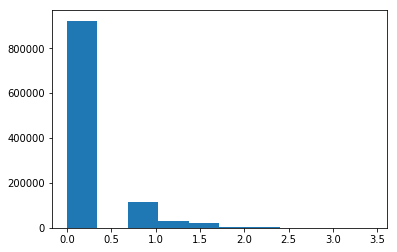

In [10]:
plt.hist(np.log(df['V100'].dropna()+1))

In [ ]:
collections.Counter(df['M5'])

8.0